In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Data Loading
d = pd.read_csv('retail_sales_dataset.csv')
df = pd.DataFrame(d)

In [12]:
# Basic Check
df.head() # fetch first five records

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [13]:
df.info() # show memory usase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [14]:
# finding null values for each columns
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [17]:
print("Total sales : {}".format(df['Quantity'].sum()))
print("Total profit: {}".format(df["Total Amount"].sum()))

Total sales : 2514
Total profit: 456000


In [18]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [19]:
# check for duplicates
df.duplicated().sum()

0

In [20]:
#  Descriptive analysis

In [21]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [22]:
# time series analysis

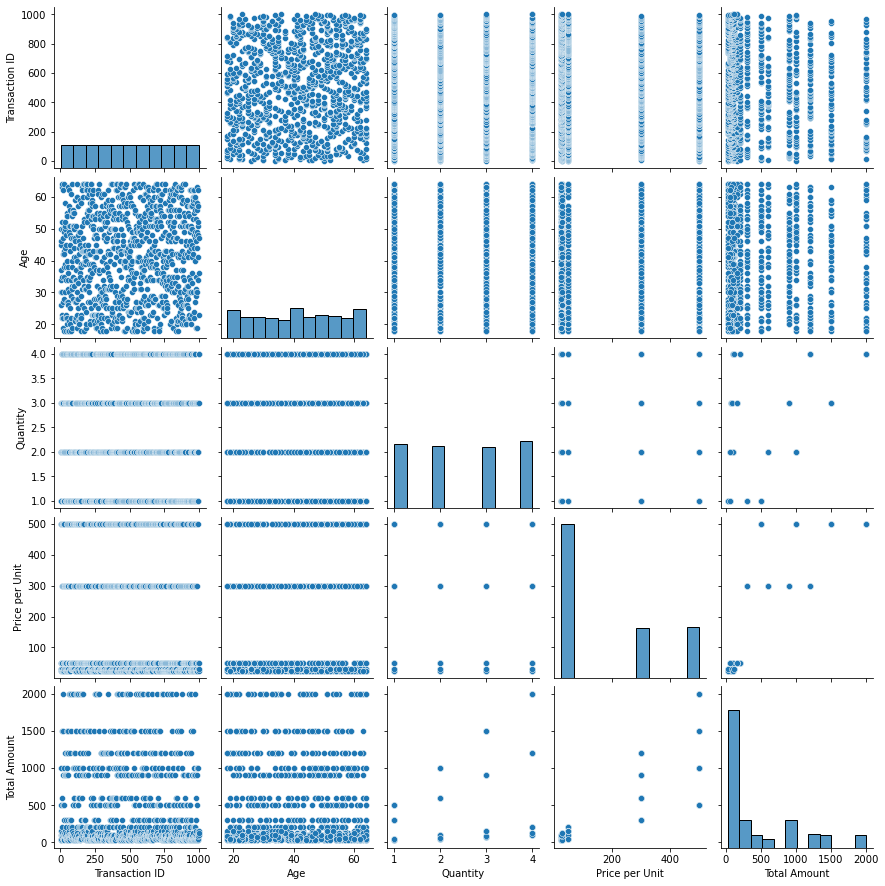

In [23]:
sns.pairplot(df)

In [24]:
# Customer and Product Analsysis with Visualization

In [25]:
df["Product Category"].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

<AxesSubplot:xlabel='Product Category', ylabel='count'>

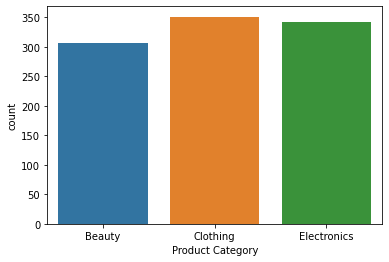

In [26]:
sns.countplot(x=df["Product Category"])

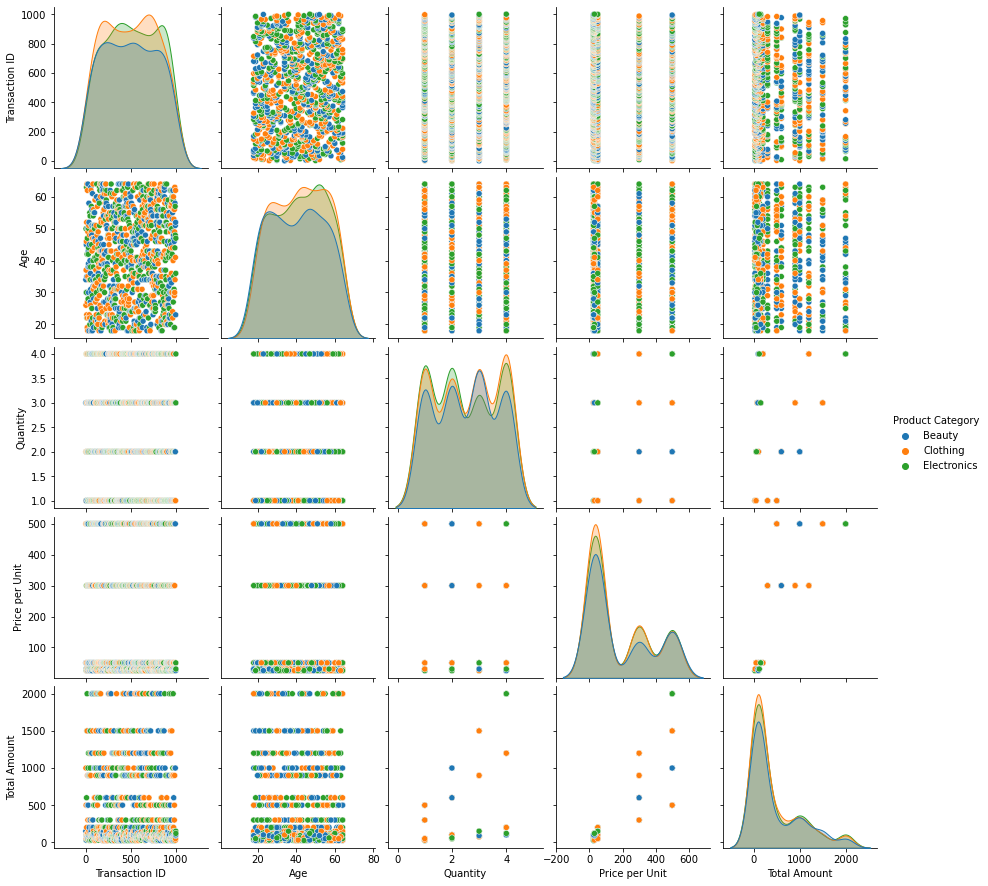

In [28]:
sns.pairplot(df, hue="Product Category")

In [29]:
p = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()
p

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


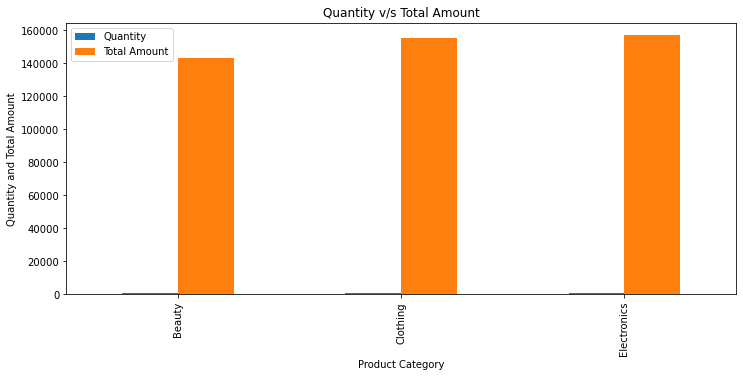

In [31]:
p.plot(kind="bar",figsize=(12,5))
plt.title("Quantity v/s Total Amount")
plt.ylabel("Quantity and Total Amount")
plt.show()

In [32]:
cate = df["Product Category"].value_counts()

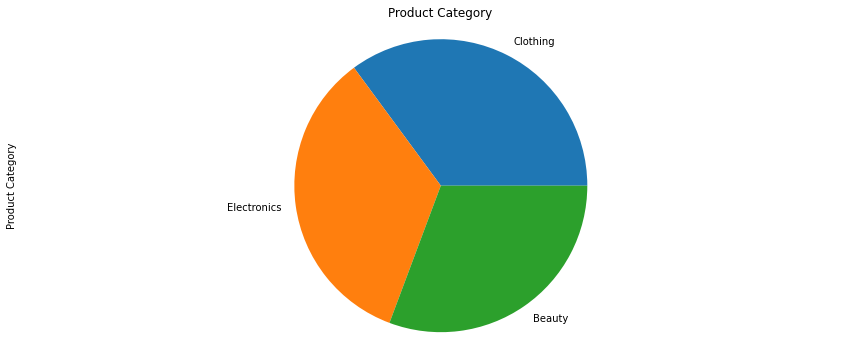

In [33]:
explode_list = [0,0.1,0.1]
color_list = ["Red","Blue","Seagreen"]
cate.plot(kind="pie",figsize=(15,6))
plt.title("Product Category")
plt.axis("equal")
plt.show()

In [34]:
gen=df["Gender"].value_counts()
gen

Female    510
Male      490
Name: Gender, dtype: int64

Coral=Female, Blue = Male


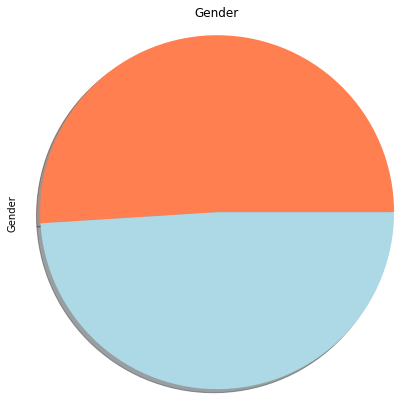

In [38]:
gen.plot(kind="pie",figsize=(7,7),shadow=True, labels = None, colors=["coral","lightblue"])
print("Coral=Female, Blue = Male")
plt.title("Gender")
plt.axis("equal")
plt.show()

In [39]:
df["Price per Unit"].corr(df["Total Amount"])

0.8519248403554025

<AxesSubplot:xlabel='Price per Unit', ylabel='Total Amount'>

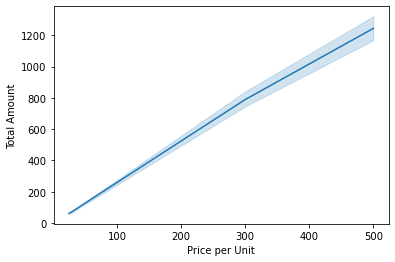

In [42]:
sns.lineplot(x="Price per Unit",y="Total Amount",data=df)